<a href="https://colab.research.google.com/github/cristinarainich/Child-Mind-Institute-Project/blob/main/behavioral_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import math
import pylab as pl
import seaborn as sns
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
sns.set()

In [4]:
working_path = Path('/content/drive/MyDrive/KKNV/CMI')

In [5]:
cd /content/drive/MyDrive/KKNV/CMI

/content/drive/MyDrive/KKNV/CMI


In [6]:
!ls /content/drive/MyDrive/KKNV/CMI

'CMI Project. Updates.gslides'	 HBN_R1_1_Pheno.csv   HBN_R6_Pheno.csv	 old
 data_summary.csv		 HBN_R11_Pheno.csv    HBN_R7_Pheno.csv	 participants.tsv
 data_summary_updated.csv	 HBN_R2_1_Pheno.csv   HBN_R8_Pheno.csv	 query_September2024.csv
 final_data.csv			 HBN_R3_Pheno.csv     HBN_R9_Pheno.csv
 final_ids.csv			 HBN_R4_Pheno.csv     id_list.txt
 HBN_R10_Pheno.csv		 HBN_R5_Pheno.csv     missing_ids.txt


## Where to download subject's data


In [ ]:
# info on whether there are phenotypical full files and imaging data availale
file1 = pd.read_csv(
    working_path.joinpath('HBN_R1_1_Pheno.csv'),
    index_col=None
)
file2 = pd.read_csv(
    working_path.joinpath('HBN_R2_1_Pheno.csv'),
    index_col=None
)
file3 = pd.read_csv(
    working_path.joinpath('HBN_R3_Pheno.csv'),
    index_col=None
)
file4 = pd.read_csv(
    working_path.joinpath('HBN_R4_Pheno.csv'),
    index_col=None
)
file5 = pd.read_csv(
    working_path.joinpath('HBN_R5_Pheno.csv'),
    index_col=None
)
file6 = pd.read_csv(
    working_path.joinpath('HBN_R6_Pheno.csv'),
    index_col=None
)
file7 = pd.read_csv(
    working_path.joinpath('HBN_R7_Pheno.csv'),
    index_col=None
)
file8 = pd.read_csv(
    working_path.joinpath('HBN_R8_Pheno.csv'),
    index_col=None
)
file9 = pd.read_csv(
    working_path.joinpath('HBN_R9_Pheno.csv'),
    index_col=None
)
file10 = pd.read_csv(
    working_path.joinpath('HBN_R10_Pheno.csv'),
    index_col=None
)
file11 = pd.read_csv(
    working_path.joinpath('HBN_R11_Pheno.csv'),
    index_col=None
)

In [ ]:
files = [
    file1, file2, file3, file4, file5, file6, file7, file8, file9, file10, file11
    ]
for i in range(0, 11):
  release_info = files[i]
  release_info['Release'] = i + 1

In [ ]:
# creating a common df on the info from all the releases
fullpheno = pd.DataFrame()
for i in files:
  fullpheno = pd.concat([fullpheno, i])

In [ ]:
print('The shape of the fullpheno file :', fullpheno.shape)
print('The number of duplicated entries in the fullpheno file: ', fullpheno['EID'].duplicated().sum())
# this basically means that the neuroimaging data from the same participants could be in different releases

The shape of the fullpheno file : (5810, 7)
The number of duplicated entries in the fullpheno file:  1246


In [ ]:
ids = pd.read_csv(
    working_path.joinpath('final_ids.csv'),
    index_col=None
)

In [ ]:
final_ids = ids['Identifiers'].values.tolist()
print('The number of sibjects in our sample: ', len(final_ids))

The number of sibjects in our sample:  619


In [ ]:
# Write the IDs to a text file in Colab
with open('id_list.txt', 'w') as file:
    for id in final_ids:
        file.write(id + '\n')


In [ ]:
from google.colab import files
files.download('id_list.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# so now we need to compare our subjects and see in what releases we might have their data
release = []
no_release_ids = [] # ids that are in final id .csv and in our sample, but absent from pheno data files
for id in final_ids:
  subset = fullpheno[fullpheno['EID'] == id]
  release_info = subset['Release'].values.tolist()
  if len(release_info) == 1:
    release.append(release_info[0])
  elif len(release_info) == 0:
    no_release_ids.append(id)
    release.append('No release information')
  else:
    name = ''
    for i in release_info:
      name = name + str(i) + ' '
    release.append(name)

ids['Release'] = release

In [ ]:
ids.groupby(['Release'])[['Identifiers']].count()

,Identifiers
Release,
1,120
2,15
3,13
4,39
5,22
6,16
7,50
8,51
9,38


In [ ]:
# manual search in the database - where they could be if they are there at all
no_release_ids

['NDARAE264WPZ',
 'NDARBE220VRK',
 'NDARCU811WCY',
 'NDARDX969ECK',
 'NDAREA136BDX',
 'NDAREY721PVD',
 'NDARKK745DHA',
 'NDARLN658KCD',
 'NDARMG114FCW',
 'NDARNK354JWK',
 'NDARRY217HD3',
 'NDARTK435YWU',
 'NDARVN280JTN',
 'NDARWP864WGV',
 'NDARZT011LBZ',
 'NDARBV503LF7',
 'NDARFB784LDG',
 'NDARPK265ZXW',
 'NDARUL596DY9']

I checked and downloaded the MRI datasets that we have. Here is the file called missing_ids.txt with the identifiers for whome we don't have an MRI set.

In [ ]:
with open(working_path.joinpath('missing_ids.txt'), 'r') as file:
    content = file.read()

# Convert content into a list by splitting on new lines
missing_ids = content.splitlines()  # This will create a list of items
print('The number of missing ids: ', len(missing_ids))

<class 'str'>
The number of missing ids:  139


In [ ]:
notes_missing_ids_1 = ['NDARAE264WPZ',
 'NDARBE220VRK',
 'NDARCU811WCY',
 'NDARDX969ECK',
 'NDAREA136BDX',
 'NDAREY721PVD',
 'NDARKK745DHA',
 'NDARLN658KCD',
 'NDARMG114FCW',
 'NDARNK354JWK',
 'NDARRY217HD3',
 'NDARTK435YWU',
 'NDARWP864WGV',
 'NDARZT011LBZ',
 'NDARBV503LF7',
 'NDARFB784LDG',
 'NDARPK265ZXW',
 'NDARUL596DY9']

In [ ]:
notes_missing_ids_2 = 'NDARAN385MDH, NDARBH024NH2, NDAREL622FA6, NDAREW976FNL, NDARFF598HGT, NDARFY075REK, NDARGR875AXY, NDARGV956EGX, NDARHB000YF8, NDARHN131ZP6, NDARHW650FXU, NDARJH441HJD, NDARKU278YRR, NDARLA395AG8, NDARLC358CYJ, NDARLX816JUZ, NDARMH625WKL, NDARNP399JVF, NDARRG415BJM, NDARTX934NH6, NDARUV418FB8, NDARUX114RGJ, NDARVV248VW0, NDARVX337AC0, NDARWZ495PG4, NDARYJ389DWX, NDARYP516VUU, NDARAU447JZH, NDARVM025NCF, NDARDR296XHN, NDARTF566PYH, NDARXT325FV6, NDARAG584XLU, NDARDJ092YKH, NDARDN924BV2, NDAREW201WD9, NDARGZ282DLD, NDARMV575DC1, NDARTC707KPU, NDARVX856RHN, NDARWX051KEV, NDARYY694NE7, NDARDV245WJG, NDARJH763NPD, NDARLE091XAZ, NDARPE551CK7, NDARPL596YTD, NDARRV505ND6, NDARYJ735XPK, NDARHP039DBU, NDARJJ817UP1, NDARLJ168LXY, NDARWF205BUM, NDARWN424BPK, NDAREU438HAF, NDARGN721GKT, NDARJV411EH6, NDARKH291KRE, NDARME573TRB, NDARPC931KR1, NDARTL667CCG,NDARUV147TDD, NDARVF039ZLX, NDARXG799KWJ, NDARZK891FTB, NDARZM580BG2, NDARBJ016AKE, NDARFJ988HKR, NDARGV263ZRY, NDARHA780UYE, NDARMH488KY0, NDARRH199NCH, NDARRV410KY1, NDARTF150VPJ, NDARTH529YKZ, NDARVK196LEK, NDARWB903FVY, NDARYG172DBJ, NDARZK709KEY, NDARAE710YWG, NDARAH239PGG, NDARAU939WUK, NDARCD453JG4, NDARET484TTP, NDARFR601RDQ, NDARGJ653MG2, NDARJC299PRZ, NDARJW989EM6, NDARLC655XBR, NDARLK690ZK9, NDARNM838ABN, NDARTC527WPZ, NDARTL878RZ2, NDARZB345GKD, NDARCM677TC1, NDARDG644LJX, NDARHL237MPV, NDARLK034DJB, NDARYR692VVC, NDARAT696TMM, NDARBH536UD3, NDARCH084YL1, NDARFE593CUC, NDARFF757TUX, NDARGW785MWF, NDARJK827DBP, NDARLB930UWR, NDARMJ741DZB, NDARRR351RXB, NDARTF250GYT, NDARTH373NE7, NDARVM414ZWU, NDARWR139LVZ, NDARZW623WYG, NDARAA773LUW, NDARAG644KE3, NDARBH701KA1, NDARCE788KXW, NDARJT819VAX, NDARPB701XDP, NDARTH261GB5'

In [ ]:
# Convert content into a list by splitting on commas
notes_2 = notes_missing_ids_2.split(',')  # This will create a list of items
notes = notes_missing_ids_1 + notes_2
notes = [note.strip() for note in notes]

In [ ]:
print(len(notes))
print(len(missing_ids))

139
139


In [ ]:
missing_from_notes = [id for id in missing_ids if id not in notes]

# Display the result
print("Missing IDs from notes:", missing_from_notes)

Missing IDs from notes: ['NDARDR804MFE', '']


In [ ]:
missing_from_missing_ids = [id for id in notes if id not in missing_ids]

# Display the result
print("Missing IDs from notes:", missing_from_missing_ids)

Missing IDs from notes: ['NDARDV245WJG', 'NDARAG644KE3']


In [ ]:
ids[ids['Identifiers'] == 'NDARDR804MFE']

,Unnamed: 0,Identifiers,Release
107,714,NDARDR804MFE,5


In [ ]:
print(len(missing_ids[:-1]))

138


In [ ]:
missing_ids = missing_ids[:-1]
values = ids['Identifiers'].values.tolist()
mri_present = []
for id in values:
  if id not in missing_ids:
    mri_present.append('Yes')
  else:
    mri_present.append('No')
print(len(mri_present))

619


In [ ]:
ids['MRI_status'] = mri_present

In [ ]:
ids.groupby(['MRI_status'])[['Identifiers']].count()

,Identifiers
MRI_status,
No,138
Yes,481


## Plots

In [ ]:
final_data = pd.read_csv(
    working_path.joinpath('final_data.csv'),
    index_col=None
)

In [ ]:
final_data['Group1'] = final_data["Group"].replace({"DD with comorbidities": "DD",
                                   "DD without comorbidities": "DD",
                                   "Control": "TD"})

In [ ]:
final_data['CTOPP,CTOPP_RL_R'].unique()

array(['18', '19', '10', '15', '22', '33', '36', '27', '28', '.', '14',
       '23', '48', '11', '31', '21', '30', '65', '12', '25', '35', '24',
       '16', '20', '13', '54', '17', '83', '34', '45', '26', '81', '32',
       '97', '38', '40', '37', '67', '46', '39', '29', '96', '8', '59',
       '66', '80', '69', '44', '57', '68', '42', '41', '79', '52', '53',
       '49', '50', '77', '43', '103'], dtype=object)

In [ ]:
ctopp = final_data[(final_data['CTOPP,CTOPP_RL_R'] != '.') &
                   (final_data['CTOPP,CTOPP_RD_R'] != '.')]
ctopp['CTOPP,CTOPP_RL_R'] = ctopp['CTOPP,CTOPP_RL_R'].astype(int)
ctopp['CTOPP,CTOPP_RD_R'] = ctopp['CTOPP,CTOPP_RD_R'].astype(int)

ctopp["CTOPP_Avg"] = (ctopp["CTOPP,CTOPP_RL_R"] + ctopp["CTOPP,CTOPP_RD_R"]) / 2
# Map 0 → Male, 1 → Female
ctopp["Sex_Label"] = ctopp["Basic_Demos,Sex"].map({0: "Male", 1: "Female"})

<ipython-input-81-37b175da4eaa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctopp['CTOPP,CTOPP_RL_R'] = ctopp['CTOPP,CTOPP_RL_R'].astype(int)
<ipython-input-81-37b175da4eaa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctopp['CTOPP,CTOPP_RD_R'] = ctopp['CTOPP,CTOPP_RD_R'].astype(int)
<ipython-input-81-37b175da4eaa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

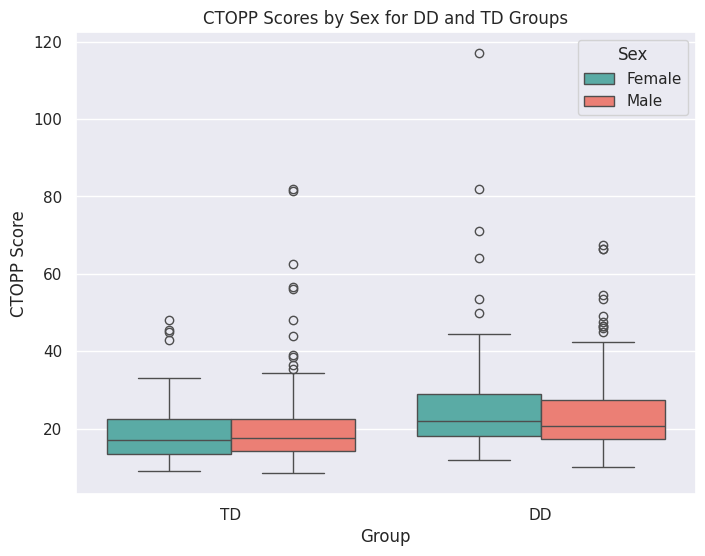

In [ ]:
pastel_palette = {"Male": "#FF6F61",  # Brighter soft red
                  "Female": "#4DB8B0"}  # Brighter soft blue


plt.figure(figsize=(8, 6))
sns.boxplot(x="Group1", y="CTOPP_Avg", hue="Sex_Label", data=ctopp, palette=pastel_palette)

plt.title("CTOPP Scores by Sex for DD and TD Groups")
plt.xlabel("Group")
plt.ylabel("CTOPP Score")
plt.legend(title="Sex")
plt.show()


In [ ]:
import scipy.stats as stats

# Define pairs to compare
pairwise_comparisons = [
    ("Male DD", "Male TD"),  # Male DD vs Male TD
    ("Female DD", "Female TD"),  # Female DD vs Female TD
    ("Male TD", "Female TD"),  # Male TD vs Female TD
    ("Male DD", "Female DD")  # Male DD vs Female DD
]

# Create empty dictionary to store p-values
p_values = {}

# Perform t-tests for each pair
for comparison in pairwise_comparisons:
    group_1, group_2 = comparison
    sex_1, group_1_type = group_1.split()
    sex_2, group_2_type = group_2.split()

    # Select the corresponding group for each sex
    group_1_data = ctopp[(ctopp["Group1"] == group_1_type) & (ctopp["Sex_Label"] == sex_1)]["CTOPP_Avg"]
    group_2_data = ctopp[(ctopp["Group1"] == group_2_type) & (ctopp["Sex_Label"] == sex_2)]["CTOPP_Avg"]

    # Perform t-test
    t_stat, p_val = stats.ttest_ind(group_1_data, group_2_data)
    p_values[(group_1, group_2)] = p_val
    print(f"T-test for {group_1} vs {group_2}: p-value = {p_val}")



T-test for Male DD vs Male TD: p-value = 0.03176114127280176
T-test for Female DD vs Female TD: p-value = 3.3900917268970365e-05
T-test for Male TD vs Female TD: p-value = 0.21493688377494138
T-test for Male DD vs Female DD: p-value = 0.18950235574704627


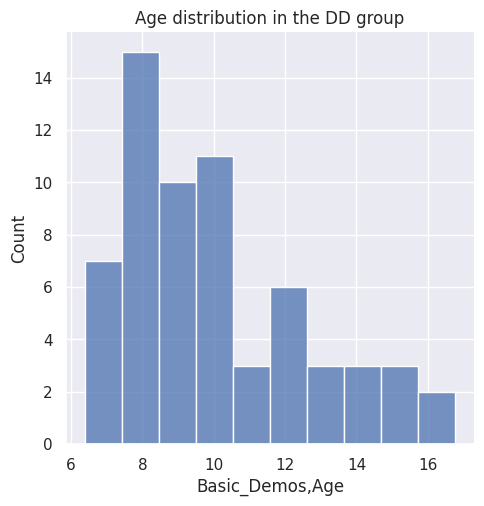

In [ ]:
sns.displot(final_data[final_data['Group'] == 'DD']['Basic_Demos,Age'],
             binwidth = 1)
pl.title('Age distribution in the DD group');

In [ ]:
# look at the differences in the Reading level b/w DD and TD
dd = final_data[final_data['Group'] != 'Control']
td = final_data[final_data['Group'] == 'Control']
dd['Total_Reading'] = dd['Total_Reading'].fillna('.')
td['Total_Reading'] = td['Total_Reading'].fillna('.')

<ipython-input-46-5f0d84eefc10>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['Total_Reading'] = dd['Total_Reading'].fillna('.')
<ipython-input-46-5f0d84eefc10>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td['Total_Reading'] = td['Total_Reading'].fillna('.')


In [ ]:
dd_read = dd[(dd['Total_Reading'] != '.') &
                  (dd['Total_Reading'] != 'pseudo, word') &
                  (dd['Total_Reading'] != 'word')]

dd_read['Total_Reading'] = dd_read['Total_Reading'].astype(float)
dd_read = dd_read['Total_Reading'].values.tolist()

td['Total_Reading'].fillna('.')
td_read = td[(td['Total_Reading'] != '.') &
                  (td['Total_Reading'] != 'pseudo, word') &
                  (td['Total_Reading'] != 'word')]

td_read['Total_Reading'] = td_read['Total_Reading'].astype(float)
td_read = td_read['Total_Reading'].values.tolist()

<ipython-input-51-cbc461bac37a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd_read['Total_Reading'] = dd_read['Total_Reading'].astype(float)
<ipython-input-51-cbc461bac37a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td_read['Total_Reading'] = td_read['Total_Reading'].astype(float)


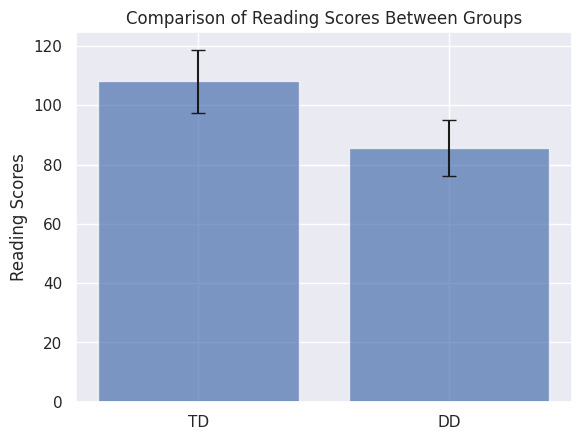

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute means
TD_mean = np.mean(td_read)
DD_mean = np.mean(dd_read)

# Compute standard deviations
TD_std = np.std(td_read)
DD_std = np.std(dd_read)

# Bar plot
plt.bar(["TD", "DD"], [TD_mean, DD_mean], yerr=[TD_std, DD_std], alpha=0.7, capsize=5)

plt.ylabel("Reading Scores")
plt.title("Comparison of Reading Scores Between Groups")
plt.show()

## Preprocessing pipeline: Combining the data_summary.csv with sites information

In [ ]:
# in this file, there is a summary on what kind of data I have for each of the subjects
# and what are the names of the files
data_summary = pd.read_csv(
    working_path.joinpath('data_summary.csv'),
    index_col=None
)

# here is the final dataset that I have with the information on sites and MRI parameters
final_data = pd.read_csv(
    working_path.joinpath('final_data.csv'),
    index_col=None
)

In [ ]:
# ids for whom i didn't find the data in the HBN data storage
missing_ids = ['NDARHP039DBU', 'NDARBE220VRK', 'NDARJC299PRZ', 'NDARGV263ZRY',
               'NDARYR692VVC', 'NDARCM677TC1', 'NDARJK827DBP', 'NDARAT696TMM', 'NDARLA395AG8',
               'NDARZK709KEY', 'NDARVF039ZLX', 'NDARUX114RGJ', 'NDARGW785MWF', 'NDARWF205BUM',
               'NDARFF757TUX', 'NDARLC358CYJ', 'NDARVM414ZWU', 'NDARWB903FVY', 'NDARKU278YRR',
               'NDARJH441HJD', 'NDARDJ092YKH', 'NDARTH373NE7', 'NDARVX337AC0', 'NDARYG172DBJ',
               'NDARJH763NPD', 'NDARWZ495PG4', 'NDARAA773LUW', 'NDARYP516VUU', 'NDARHW650FXU',
               'NDARRG415BJM', 'NDARPE551CK7', 'NDARYY694NE7', 'NDAREW976FNL', 'NDARDR804MFE',
               'NDARNP399JVF', 'NDARGZ282DLD', 'NDARHL237MPV', 'NDARZB345GKD', 'NDARZW623WYG',
               'NDARHB000YF8', 'NDARFE593CUC', 'NDARJT819VAX', 'NDARAG584XLU', 'NDARDN924BV2',
               'NDARRV410KY1', 'NDARUL596DY9', 'NDARBV503LF7', 'NDARWR139LVZ', 'NDARLC655XBR',
               'NDARFY075REK', 'NDARRH199NCH', 'NDAREY721PVD', 'NDARYJ389DWX', 'NDAREW201WD9',
               'NDARMV575DC1', 'NDARXG799KWJ', 'NDARRR351RXB', 'NDARTX934NH6', 'NDARFF598HGT',
               'NDARVV248VW0', 'NDARTH529YKZ', 'NDARZT011LBZ', 'NDARME573TRB', 'NDARAU447JZH',
               'NDARWN424BPK', 'NDARCE788KXW', 'NDARGN721GKT', 'NDARMJ741DZB', 'NDARBH701KA1',
               'NDARNM838ABN', 'NDARKK745DHA', 'NDAREA136BDX', 'NDARWX051KEV', 'NDARZK891FTB',
               'NDARAN385MDH', 'NDARPB701XDP', 'NDARGR875AXY', 'NDARTF250GYT', 'NDARYJ735XPK',
               'NDARAH239PGG', 'NDARAE710YWG', 'NDARUV418FB8', 'NDARNK354JWK', 'NDAREL622FA6',
               'NDARCH084YL1', 'NDARFB784LDG', 'NDARJV411EH6', 'NDARDX969ECK', 'NDARPK265ZXW',
               'NDARTF150VPJ', 'NDARRV505ND6', 'NDAREU438HAF', 'NDARDG644LJX', 'NDARVK196LEK',
               'NDARHN131ZP6', 'NDARJJ817UP1', 'NDARLE091XAZ', 'NDARLB930UWR', 'NDARLX816JUZ',
               'NDARWP864WGV', 'NDARTC707KPU', 'NDARKH291KRE', 'NDARBH024NH2', 'NDARHA780UYE',
               'NDARBJ016AKE', 'NDARMH488KY0', 'NDARTH261GB5', 'NDARET484TTP', 'NDARVM025NCF',
               'NDARRY217HD3', 'NDARDR296XHN', 'NDARMH625WKL', 'NDARFJ988HKR', 'NDARCU811WCY',
               'NDARBH536UD3', 'NDARLJ168LXY', 'NDARTK435YWU', 'NDARVX856RHN', 'NDARPC931KR1',
               'NDARUV147TDD', 'NDARMG114FCW', 'NDARGV956EGX', 'NDARLK034DJB', 'NDARXT325FV6',
               'NDARAE264WPZ', 'NDARLN658KCD', 'NDARTL667CCG']

In [ ]:
# Normalize IDs by removing "sub-" prefix in data_summary
data_summary['Identifiers'] = data_summary['Subject ID'].str.replace("sub-", "")

# Identify missing IDs
missing_from_summary = set(final_data['Identifiers']) - set(data_summary['Identifiers'])

# Compare with existing missing IDs list
new_missing_ids = list(missing_from_summary - set(missing_ids))
print(f"New missing IDs: {new_missing_ids}")

New missing IDs: []


In [ ]:
# first, let's add the necessary information to our summary table
# that would help us in building a preprocessing pipeline
# different centers - different scanning parameters

# Select relevant columns from final_data
columns_to_add = [
    'Basic_Demos,Study_Site',
    'Basic_Demos,Age',
    'MRI_Track,Age_at_Scan',
    'MRI_Track,Scan_Location',
    'MRI_Track,Clinical_Impression',
    'Group',
    'IQ'
]

# Merge the required columns based on ID
merged_data = data_summary.merge(
    final_data[['Identifiers'] + columns_to_add],
    on='Identifiers',
    how='left'
)

print("Merging complete!")

Merging complete!


In [ ]:
merged_data.shape

(492, 17)

In [ ]:
# Looks like the numbers for study sites in MRI track scan location and Basic Demos Study site are different
# and this can not be explained only with the different coding
# in the corresponding documents, study site within basic demos is not mentioned anymore
# Will use MRI scan location 1=Staten Island,2=RUBIC,3=CBIC, 4=CUNY???
merged_data.groupby('MRI_Track,Scan_Location')['Identifiers'].count()
# checking number 4 - CUNY
# checking number 3 - CBIC
# checking number 2 - RUBIC
# checking number 1 - Staten Island

,Identifiers
"MRI_Track,Scan_Location",
.,2
1,55
2,189
3,202
4,44


In [ ]:
# let's replace "." value with the actual scanner site based on the .json information
# both of them from Rutgers
merged_data['MRI_Track,Scan_Location'] = merged_data['MRI_Track,Scan_Location'].replace('.', '2')  # Replace with 0 or any number


In [ ]:
merged_data.groupby('MRI_Track,Scan_Location')['Identifiers'].count()

,Identifiers
"MRI_Track,Scan_Location",
1,55
2,191
3,202
4,44


In [ ]:
merged_data.to_csv(
    Path(working_path).joinpath('data_summary_updated.csv')
)

## Additional characteristics of the dataset

In [ ]:
qc_ratings = pd.read_csv("participants.tsv", sep="\t")
merged_data = pd.read_csv('data_summary_updated.csv', index_col=None)
final_data = pd.read_csv(
    working_path.joinpath('final_data.csv'),
    index_col=None
)

In [ ]:
# looking into the values from the paper
qc_subset = qc_ratings[qc_ratings["subject_id"].isin(merged_data["Subject ID"])]


# there are much less subjects because not all of the merged_data ones have dwi data
# and some of those were not prerpocessed because they were released later
qc_subset.shape

# 0-0.2 - definitely fail, 0.2-0.4 - probably fail, 0.4-0.6 - not sure, 0.6-0.8 probably pass, 0.8-1.0 - pass
# expert rating - mean expert ratings
# xgb_qsiprep_score - XGB-q model’s positive class probabilities
# dl_score - CNN-i + q model’s positive class probabilities
qc_subset.head()

In [ ]:
print(qc_subset.age.max())
print(qc_subset.age.min())

17.348163
5.189368


In [ ]:
# Based on experts scores
experts = qc_subset[qc_subset['expert_qc_score'].notna()]
print('Out of ', experts.shape[0], ' available subjects, ',
      experts[experts['expert_qc_score'] >= 0.6].shape[0],
      ' are of good quality')
print('')
print('Good quality: ',
    experts[experts['expert_qc_score'] >= 0.6]['subject_id'].values.tolist())
print('')
print('Needs to be doublechecked and probably excluded: ',
      experts[experts['expert_qc_score'] < 0.6]['subject_id'].values.tolist())


Out of  34  subjects,  21  are of good quality

Good quality:  ['sub-NDARAH304ED7', 'sub-NDARBW026UGE', 'sub-NDARCD182XT1', 'sub-NDARDE319VD1', 'sub-NDARDJ204EPU', 'sub-NDAREC277JCP', 'sub-NDAREF624KJN', 'sub-NDAREV848HWX', 'sub-NDARFG943GVZ', 'sub-NDARFW253GZM', 'sub-NDARGB528CP8', 'sub-NDARJH492TVW', 'sub-NDARJH707GJM', 'sub-NDARKK392ZX2', 'sub-NDARKV807EMJ', 'sub-NDARND697FLK', 'sub-NDARRB901DWV', 'sub-NDARTZ018PD5', 'sub-NDARUP249AMD', 'sub-NDARXB023AMW', 'sub-NDARYW789GNP']

Needs to be doublechecked and probably excluded:  ['sub-NDARAC857HDB', 'sub-NDARBW268XPY', 'sub-NDARDU853XZ6', 'sub-NDAREG590BNY', 'sub-NDAREX065KJU', 'sub-NDARPF042DD2', 'sub-NDARTC527WPZ', 'sub-NDARTL084LYM', 'sub-NDARXM571XCC', 'sub-NDARXZ850KHQ', 'sub-NDARZC058BA5', 'sub-NDARZR968TLL', 'sub-NDARZV421TCZ']


In [ ]:
# Based on the dl model (should be checked whether the nodel fit is good)
print('Based on dl model, out of', qc_subset.shape[0], ', ',
      qc_subset[qc_subset['dl_qc_score'] >= 0.6].shape[0], ' are of good quality')
print('Based on dl model, out of', qc_subset.shape[0], ', ',
      qc_subset[qc_subset['dl_qc_score'] < 0.6].shape[0],
      ' should be doublechecked or excluded')

Based on dl model, out of 322 ,  221  are of good quality
Based on dl model, out of 322 ,  99  should be doublechecked or excluded


In [ ]:
merged_data.groupby(['Has DWI', 'Has FUNC', 'Has ANAT', 'Has FMAP']).size().reset_index(name='Subject Count')

,Has DWI,Has FUNC,Has ANAT,Has FMAP,Subject Count
0,No,No,No,Yes,2
1,No,No,Yes,No,3
2,No,No,Yes,Yes,1
3,No,Yes,No,No,3
4,No,Yes,No,Yes,2
5,No,Yes,Yes,No,3
6,No,Yes,Yes,Yes,56
7,Yes,No,Yes,Yes,3
8,Yes,Yes,Yes,No,20
9,Yes,Yes,Yes,Yes,399


## DWI Sample

In [7]:
merged_data = pd.read_csv('data_summary_updated.csv', index_col=None)
final_data = pd.read_csv(
    working_path.joinpath('final_data.csv'),
    index_col=None
)

In [8]:
# people for whom we don't have neuroimaging data
missing_ids = ['NDARHP039DBU', 'NDARBE220VRK', 'NDARJC299PRZ', 'NDARGV263ZRY',
               'NDARYR692VVC', 'NDARCM677TC1', 'NDARJK827DBP', 'NDARAT696TMM', 'NDARLA395AG8',
               'NDARZK709KEY', 'NDARVF039ZLX', 'NDARUX114RGJ', 'NDARGW785MWF', 'NDARWF205BUM',
               'NDARFF757TUX', 'NDARLC358CYJ', 'NDARVM414ZWU', 'NDARWB903FVY', 'NDARKU278YRR',
               'NDARJH441HJD', 'NDARDJ092YKH', 'NDARTH373NE7', 'NDARVX337AC0', 'NDARYG172DBJ',
               'NDARJH763NPD', 'NDARWZ495PG4', 'NDARAA773LUW', 'NDARYP516VUU', 'NDARHW650FXU',
               'NDARRG415BJM', 'NDARPE551CK7', 'NDARYY694NE7', 'NDAREW976FNL', 'NDARDR804MFE',
               'NDARNP399JVF', 'NDARGZ282DLD', 'NDARHL237MPV', 'NDARZB345GKD', 'NDARZW623WYG',
               'NDARHB000YF8', 'NDARFE593CUC', 'NDARJT819VAX', 'NDARAG584XLU', 'NDARDN924BV2',
               'NDARRV410KY1', 'NDARUL596DY9', 'NDARBV503LF7', 'NDARWR139LVZ', 'NDARLC655XBR',
               'NDARFY075REK', 'NDARRH199NCH', 'NDAREY721PVD', 'NDARYJ389DWX', 'NDAREW201WD9',
               'NDARMV575DC1', 'NDARXG799KWJ', 'NDARRR351RXB', 'NDARTX934NH6', 'NDARFF598HGT',
               'NDARVV248VW0', 'NDARTH529YKZ', 'NDARZT011LBZ', 'NDARME573TRB', 'NDARAU447JZH',
               'NDARWN424BPK', 'NDARCE788KXW', 'NDARGN721GKT', 'NDARMJ741DZB', 'NDARBH701KA1',
               'NDARNM838ABN', 'NDARKK745DHA', 'NDAREA136BDX', 'NDARWX051KEV', 'NDARZK891FTB',
               'NDARAN385MDH', 'NDARPB701XDP', 'NDARGR875AXY', 'NDARTF250GYT', 'NDARYJ735XPK',
               'NDARAH239PGG', 'NDARAE710YWG', 'NDARUV418FB8', 'NDARNK354JWK', 'NDAREL622FA6',
               'NDARCH084YL1', 'NDARFB784LDG', 'NDARJV411EH6', 'NDARDX969ECK', 'NDARPK265ZXW',
               'NDARTF150VPJ', 'NDARRV505ND6', 'NDAREU438HAF', 'NDARDG644LJX', 'NDARVK196LEK',
               'NDARHN131ZP6', 'NDARJJ817UP1', 'NDARLE091XAZ', 'NDARLB930UWR', 'NDARLX816JUZ',
               'NDARWP864WGV', 'NDARTC707KPU', 'NDARKH291KRE', 'NDARBH024NH2', 'NDARHA780UYE',
               'NDARBJ016AKE', 'NDARMH488KY0', 'NDARTH261GB5', 'NDARET484TTP', 'NDARVM025NCF',
               'NDARRY217HD3', 'NDARDR296XHN', 'NDARMH625WKL', 'NDARFJ988HKR', 'NDARCU811WCY',
               'NDARBH536UD3', 'NDARLJ168LXY', 'NDARTK435YWU', 'NDARVX856RHN', 'NDARPC931KR1',
               'NDARUV147TDD', 'NDARMG114FCW', 'NDARGV956EGX', 'NDARLK034DJB', 'NDARXT325FV6',
               'NDARAE264WPZ', 'NDARLN658KCD', 'NDARTL667CCG']

**Step 1. all the neuroimaging dataset**

In [9]:
dwi_sample = merged_data[merged_data['Has DWI'] == 'Yes']
print("Total sample", dwi_sample.shape[0], 'particpants')
print(dwi_sample[dwi_sample['Group'] != 'Control'].shape[0], 'dyslexics')
print(dwi_sample[dwi_sample['Group'] == 'Control'].shape[0], 'controls')

Total sample 422 particpants
243 dyslexics
179 controls


In [10]:
dwi_sample['MRI_Track,Age_at_Scan'] = dwi_sample['MRI_Track,Age_at_Scan'].astype(float)

<ipython-input-10-9ed95a0c6240>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dwi_sample['MRI_Track,Age_at_Scan'] = dwi_sample['MRI_Track,Age_at_Scan'].astype(float)


In [11]:
dwi_sample.groupby('MRI_Track,Scan_Location')['Identifiers'].count()

,Identifiers
"MRI_Track,Scan_Location",
1,51
2,141
3,191
4,39


In [12]:
# Staten Island 1
dwi_sample[dwi_sample['MRI_Track,Scan_Location'] == 1].groupby(['Group'])['Identifiers'].count()

,Identifiers
Group,
Control,36
DD,3
DD with comorbidities,12


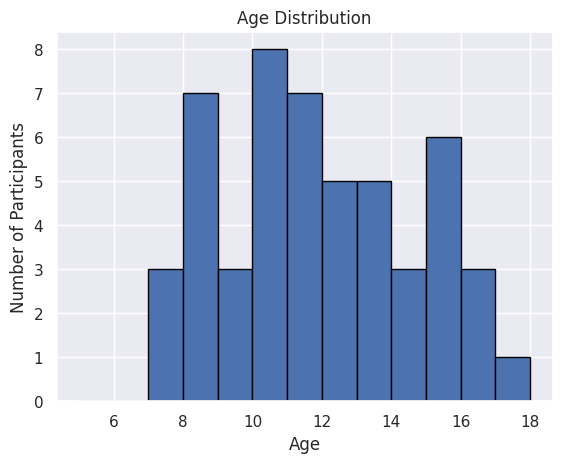

In [13]:
dwi_sample[dwi_sample['MRI_Track,Scan_Location'] == 1]['MRI_Track,Age_at_Scan'].hist(bins=range(5, 19), edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.show()

In [ ]:
bins = list(range(5, 19))  # Bins from 5 to 18 (inclusive of 5, exclusive of 19)
labels = [f"{i}-{i+1}" for i in bins[:-1]]  # Label for each age bin

# Use pd.cut without assigning a new column
age_group_counts = pd.cut(dwi_sample[dwi_sample['MRI_Track,Scan_Location'] == 1]['MRI_Track,Age_at_Scan'], bins=bins, right=False, labels=labels).value_counts().sort_index()

# Print the result
print(age_group_counts)

MRI_Track,Age_at_Scan
5-6      0
6-7      0
7-8      3
8-9      7
9-10     3
10-11    8
11-12    7
12-13    5
13-14    5
14-15    3
15-16    6
16-17    3
17-18    1
Name: count, dtype: int64


In [ ]:
# Rutgers 2
dwi_sample[dwi_sample['MRI_Track,Scan_Location'] == 2].groupby(['Group'])['Identifiers'].count()

,Identifiers
Group,
Control,63
DD,19
DD with comorbidities,59


In [ ]:
# CBIC 3
dwi_sample[dwi_sample['MRI_Track,Scan_Location'] == 3].groupby(['Group'])['Identifiers'].count()

,Identifiers
Group,
Control,64
DD,14
DD with comorbidities,113


In [ ]:
# CUNY 4
dwi_sample[dwi_sample['MRI_Track,Scan_Location'] == 4].groupby(['Group'])['Identifiers'].count()

,Identifiers
Group,
Control,16
DD,4
DD with comorbidities,19


**Step 2. We are getting rid of Staten Island data because we have too different neuroimaging parameters at this site compared to all the others.**

In [14]:
dwi_sample = dwi_sample[dwi_sample['MRI_Track,Scan_Location'] != 1]

In [15]:
print("Total sample", dwi_sample.shape[0], 'particpants')
print(dwi_sample[dwi_sample['Group'] != 'Control'].shape[0], 'dyslexics')
print(dwi_sample[dwi_sample['Group'] == 'Control'].shape[0], 'controls')

Total sample 371 particpants
228 dyslexics
143 controls


**Step 3. We might wanna exclude people with no FMAP.**

In [ ]:
# people without fieldmaps
bins = list(range(5, 19))  # Bins from 5 to 18 (inclusive of 5, exclusive of 19)
labels = [f"{i}-{i+1}" for i in bins[:-1]]  # Label for each age bin

# Use pd.cut without assigning a new column
age_group_counts = pd.cut(dwi_sample[dwi_sample['Has FMAP'] == 'No']['MRI_Track,Age_at_Scan'], bins=bins, right=False, labels=labels).value_counts().sort_index()

# Print the result
print(age_group_counts)

MRI_Track,Age_at_Scan
5-6      0
6-7      2
7-8      3
8-9      2
9-10     4
10-11    4
11-12    1
12-13    0
13-14    1
14-15    2
15-16    0
16-17    1
17-18    0
Name: count, dtype: int64


In [16]:
no_fmap_excluded = dwi_sample[dwi_sample['Has FMAP'] != 'No']
all_fmap_options = dwi_sample.copy()

In [17]:
print("Total sample when fmap excluded", no_fmap_excluded.shape[0], 'particpants')
print(no_fmap_excluded[no_fmap_excluded['Group'] != 'Control'].shape[0], 'dyslexics')
print(no_fmap_excluded[no_fmap_excluded['Group'] == 'Control'].shape[0], 'controls')

Total sample when fmap excluded 351 particpants
215 dyslexics
136 controls


In [18]:
no_fmap_excluded.groupby('MRI_Track,Scan_Location')['Identifiers'].count()

,Identifiers
"MRI_Track,Scan_Location",
2,138
3,174
4,39


In [19]:
print('When fmap excluded, Rutgers: dyslexics',
      no_fmap_excluded[(no_fmap_excluded['MRI_Track,Scan_Location'] == 2) &
                       (no_fmap_excluded['Group'] != 'Control')].shape[0],
      ', controls', no_fmap_excluded[(no_fmap_excluded['MRI_Track,Scan_Location'] == 2) &
                       (no_fmap_excluded['Group'] == 'Control')].shape[0])

print('When fmap excluded, CBIC: dyslexics',
      no_fmap_excluded[(no_fmap_excluded['MRI_Track,Scan_Location'] == 3) &
                       (no_fmap_excluded['Group'] != 'Control')].shape[0],
      ', controls', no_fmap_excluded[(no_fmap_excluded['MRI_Track,Scan_Location'] == 3) &
                       (no_fmap_excluded['Group'] == 'Control')].shape[0])

print('When fmap excluded, CUNY: dyslexics',
      no_fmap_excluded[(no_fmap_excluded['MRI_Track,Scan_Location'] == 4) &
                       (no_fmap_excluded['Group'] != 'Control')].shape[0],
      ', controls', no_fmap_excluded[(no_fmap_excluded['MRI_Track,Scan_Location'] == 4) &
                       (no_fmap_excluded['Group'] == 'Control')].shape[0])

When fmap excluded, Rutgers: dyslexics 77 , controls 61
When fmap excluded, CBIC: dyslexics 115 , controls 59
When fmap excluded, CUNY: dyslexics 23 , controls 16


**Step 4. We might want to exclude people with low IQ.**

In [45]:
# people with low IQ
# Let's provide some more statistics on the IQ options and ranges that we have:
bins = list(range(5, 19))  # Bins from 5 to 18 (inclusive of 5, exclusive of 19)
labels = [f"{i}-{i+1}" for i in bins[:-1]]  # Label for each age bin

print('IQ = 70')
print(no_fmap_excluded[no_fmap_excluded['IQ'] == 70].shape[0], 'subjects')
print(no_fmap_excluded[(no_fmap_excluded['IQ'] == 70) &
                       (no_fmap_excluded['Group'] != 'Control')].shape[0], 'dyslexics')
print(no_fmap_excluded[(no_fmap_excluded['IQ'] == 70) &
                       (no_fmap_excluded['Group'] == 'Control')].shape[0], 'controls')

age_group_counts = pd.cut(no_fmap_excluded[no_fmap_excluded['IQ'] == 70]['MRI_Track,Age_at_Scan'], bins=bins, right=False, labels=labels).value_counts().sort_index()
print(age_group_counts)

print('')
print('70 < IQ <= 75')
print(no_fmap_excluded[(no_fmap_excluded['IQ'] > 70) & (no_fmap_excluded['IQ'] <= 75)].shape[0])
print(no_fmap_excluded[(no_fmap_excluded['IQ'] > 70) & (no_fmap_excluded['IQ'] <= 75) &
                       (no_fmap_excluded['Group'] != 'Control')].shape[0], 'dyslexics')
print(no_fmap_excluded[(no_fmap_excluded['IQ'] > 70) & (no_fmap_excluded['IQ'] <= 75) &
                       (no_fmap_excluded['Group'] == 'Control')].shape[0], 'controls')
age_group_counts = pd.cut(no_fmap_excluded[(no_fmap_excluded['IQ'] > 70) & (no_fmap_excluded['IQ'] <= 75)]['MRI_Track,Age_at_Scan'], bins=bins, right=False, labels=labels).value_counts().sort_index()
print(age_group_counts)

print('')
print('75 < IQ <= 80')
print(no_fmap_excluded[(no_fmap_excluded['IQ'] > 75) & (no_fmap_excluded['IQ'] <= 80)].shape[0])
print(no_fmap_excluded[(no_fmap_excluded['IQ'] > 75) & (no_fmap_excluded['IQ'] <= 80) &
                       (no_fmap_excluded['Group'] != 'Control')].shape[0], 'dyslexics')
print(no_fmap_excluded[(no_fmap_excluded['IQ'] > 75) & (no_fmap_excluded['IQ'] <= 80) &
                       (no_fmap_excluded['Group'] == 'Control')].shape[0], 'controls')
age_group_counts = pd.cut(no_fmap_excluded[(no_fmap_excluded['IQ'] > 75) & (no_fmap_excluded['IQ'] <= 80)]['MRI_Track,Age_at_Scan'], bins=bins, right=False, labels=labels).value_counts().sort_index()
print(age_group_counts)

print('')
print('80 < IQ <= 85')
print(no_fmap_excluded[(no_fmap_excluded['IQ'] > 80) & (no_fmap_excluded['IQ'] <= 85)].shape[0])
print(no_fmap_excluded[(no_fmap_excluded['IQ'] > 80) & (no_fmap_excluded['IQ'] <= 85) &
                       (no_fmap_excluded['Group'] != 'Control')].shape[0], 'dyslexics')
print(no_fmap_excluded[(no_fmap_excluded['IQ'] > 80) & (no_fmap_excluded['IQ'] <= 85) &
                       (no_fmap_excluded['Group'] == 'Control')].shape[0], 'controls')
age_group_counts = pd.cut(no_fmap_excluded[(no_fmap_excluded['IQ'] > 80) & (no_fmap_excluded['IQ'] <= 85)]['MRI_Track,Age_at_Scan'], bins=bins, right=False, labels=labels).value_counts().sort_index()
print(age_group_counts)

IQ = 70
2 subjects
2 dyslexics
0 controls
MRI_Track,Age_at_Scan
5-6      0
6-7      0
7-8      0
8-9      1
9-10     0
10-11    0
11-12    1
12-13    0
13-14    0
14-15    0
15-16    0
16-17    0
17-18    0
Name: count, dtype: int64

70 < IQ <= 75
5
5 dyslexics
0 controls
MRI_Track,Age_at_Scan
5-6      0
6-7      0
7-8      0
8-9      0
9-10     1
10-11    0
11-12    1
12-13    1
13-14    0
14-15    1
15-16    1
16-17    0
17-18    0
Name: count, dtype: int64

75 < IQ <= 80
24
21 dyslexics
3 controls
MRI_Track,Age_at_Scan
5-6      1
6-7      4
7-8      0
8-9      4
9-10     2
10-11    3
11-12    5
12-13    1
13-14    0
14-15    2
15-16    1
16-17    0
17-18    1
Name: count, dtype: int64

80 < IQ <= 85
29
24 dyslexics
5 controls
MRI_Track,Age_at_Scan
5-6      0
6-7      0
7-8      5
8-9      5
9-10     8
10-11    2
11-12    4
12-13    3
13-14    0
14-15    1
15-16    0
16-17    0
17-18    1
Name: count, dtype: int64


In [36]:

print('Total sample when no fmap option included and  70 < IQ < 85',
      all_fmap_options[all_fmap_options['IQ'] < 85].shape[0])
print(all_fmap_options[(all_fmap_options['IQ'] < 85) & (all_fmap_options['Group'] != 'Control')].shape[0], 'dyslexics')
print(all_fmap_options[(all_fmap_options['IQ'] < 85) & (all_fmap_options['Group'] == 'Control')].shape[0], 'controls')
print('')
bins = list(range(5, 19))  # Bins from 5 to 18 (inclusive of 5, exclusive of 19)
labels = [f"{i}-{i+1}" for i in bins[:-1]]  # Label for each age bin
# Use pd.cut without assigning a new column
age_group_counts = pd.cut(all_fmap_options[all_fmap_options['IQ'] < 85]['MRI_Track,Age_at_Scan'], bins=bins, right=False, labels=labels).value_counts().sort_index()
# Print the result
print(age_group_counts)

Total sample when no fmap option included and  70 < IQ < 85 58
50 dyslexics
8 controls

MRI_Track,Age_at_Scan
5-6       1
6-7       4
7-8       5
8-9       8
9-10      9
10-11     5
11-12    11
12-13     5
13-14     0
14-15     6
15-16     2
16-17     0
17-18     2
Name: count, dtype: int64


In [37]:
# Let's provide some more statistics on the IQ options and ranges that we have:
print('Total sample when no fmap option excluded and  70 < IQ < 85',
      no_fmap_excluded[no_fmap_excluded['IQ'] < 85].shape[0])
print(no_fmap_excluded[(no_fmap_excluded['IQ'] < 85) & (no_fmap_excluded['Group'] != 'Control')].shape[0], 'dyslexics')
print(no_fmap_excluded[(no_fmap_excluded['IQ'] < 85) & (no_fmap_excluded['Group'] == 'Control')].shape[0], 'controls')
print('')
bins = list(range(5, 19))  # Bins from 5 to 18 (inclusive of 5, exclusive of 19)
labels = [f"{i}-{i+1}" for i in bins[:-1]]  # Label for each age bin
# Use pd.cut without assigning a new column
age_group_counts = pd.cut(no_fmap_excluded[no_fmap_excluded['IQ'] < 85]['MRI_Track,Age_at_Scan'], bins=bins, right=False, labels=labels).value_counts().sort_index()
# Print the result
print(age_group_counts)

Total sample when no fmap option excluded and  70 < IQ < 85 54
46 dyslexics
8 controls

MRI_Track,Age_at_Scan
5-6       1
6-7       4
7-8       4
8-9       8
9-10      8
10-11     5
11-12    11
12-13     5
13-14     0
14-15     4
15-16     2
16-17     0
17-18     2
Name: count, dtype: int64


In [29]:
# if we exclude these IQ points between 70 and 85 and people with no fmap:
no_fmap_excluded_iq_more_85 = no_fmap_excluded[no_fmap_excluded['IQ'] >= 85]

print("Total sample when no fmap option excluded and IQ >= 85",
      no_fmap_excluded_iq_more_85.shape[0], 'particpants')
print(no_fmap_excluded_iq_more_85[no_fmap_excluded_iq_more_85['Group'] != 'Control'].shape[0], 'dyslexics')
print(no_fmap_excluded_iq_more_85[no_fmap_excluded_iq_more_85['Group'] == 'Control'].shape[0], 'controls')
print('')
# people with low IQ
bins = list(range(5, 19))  # Bins from 5 to 18 (inclusive of 5, exclusive of 19)
labels = [f"{i}-{i+1}" for i in bins[:-1]]  # Label for each age bin
# Use pd.cut without assigning a new column
age_group_counts = pd.cut(no_fmap_excluded_iq_more_85['MRI_Track,Age_at_Scan'], bins=bins, right=False, labels=labels).value_counts().sort_index()

# Print the result
print(age_group_counts)
print('')
print(no_fmap_excluded_iq_more_85.groupby('MRI_Track,Scan_Location')['Identifiers'].count())
print('')
print('When fmap excluded and IQ >= 85, Rutgers: dyslexics',
      no_fmap_excluded_iq_more_85[(no_fmap_excluded_iq_more_85['MRI_Track,Scan_Location'] == 2) &
                       (no_fmap_excluded_iq_more_85['Group'] != 'Control')].shape[0],
      ', controls', no_fmap_excluded_iq_more_85[(no_fmap_excluded_iq_more_85['MRI_Track,Scan_Location'] == 2) &
                       (no_fmap_excluded_iq_more_85['Group'] == 'Control')].shape[0])

print('When fmap excluded and IQ >= 85, CBIC: dyslexics',
      no_fmap_excluded_iq_more_85[(no_fmap_excluded_iq_more_85['MRI_Track,Scan_Location'] == 3) &
                       (no_fmap_excluded_iq_more_85['Group'] != 'Control')].shape[0],
      ', controls', no_fmap_excluded_iq_more_85[(no_fmap_excluded_iq_more_85['MRI_Track,Scan_Location'] == 3) &
                       (no_fmap_excluded_iq_more_85['Group'] == 'Control')].shape[0])

print('When fmap excluded and IQ >= 85, CUNY: dyslexics',
      no_fmap_excluded_iq_more_85[(no_fmap_excluded_iq_more_85['MRI_Track,Scan_Location'] == 4) &
                       (no_fmap_excluded_iq_more_85['Group'] != 'Control')].shape[0],
      ', controls', no_fmap_excluded_iq_more_85[(no_fmap_excluded_iq_more_85['MRI_Track,Scan_Location'] == 4) &
                       (no_fmap_excluded_iq_more_85['Group'] == 'Control')].shape[0])

Total sample when no fmap option excluded and IQ >= 85 297 particpants
169 dyslexics
128 controls

MRI_Track,Age_at_Scan
5-6      15
6-7      34
7-8      52
8-9      45
9-10     39
10-11    28
11-12    24
12-13    17
13-14    10
14-15    16
15-16     6
16-17     5
17-18     6
Name: count, dtype: int64

MRI_Track,Scan_Location
2    118
3    146
4     33
Name: Identifiers, dtype: int64

When fmap excluded and IQ >= 85, Rutgers: dyslexics 65 , controls 53
When fmap excluded and IQ >= 85, CBIC: dyslexics 87 , controls 59
When fmap excluded and IQ >= 85, CUNY: dyslexics 17 , controls 16


In [31]:
# if we exclude these IQ points between 70 and 85 but include people with no fmap:
all_fmap_options_iq_more_85 = all_fmap_options[all_fmap_options['IQ'] >= 85]

print("Total sample when no fmap option included and IQ >= 85",
      all_fmap_options_iq_more_85.shape[0], 'particpants')
print(all_fmap_options_iq_more_85[all_fmap_options_iq_more_85['Group'] != 'Control'].shape[0], 'dyslexics')
print(all_fmap_options_iq_more_85[all_fmap_options_iq_more_85['Group'] == 'Control'].shape[0], 'controls')
print('')
# people with low IQ
bins = list(range(5, 19))  # Bins from 5 to 18 (inclusive of 5, exclusive of 19)
labels = [f"{i}-{i+1}" for i in bins[:-1]]  # Label for each age bin
# Use pd.cut without assigning a new column
age_group_counts = pd.cut(all_fmap_options_iq_more_85['MRI_Track,Age_at_Scan'], bins=bins, right=False, labels=labels).value_counts().sort_index()

# Print the result
print(age_group_counts)
print('')
print(all_fmap_options_iq_more_85.groupby('MRI_Track,Scan_Location')['Identifiers'].count())
print('')
print('When no fmap included and IQ >= 85, Rutgers: dyslexics',
      all_fmap_options_iq_more_85[(all_fmap_options_iq_more_85['MRI_Track,Scan_Location'] == 2) &
                       (all_fmap_options_iq_more_85['Group'] != 'Control')].shape[0],
      ', controls', all_fmap_options_iq_more_85[(all_fmap_options_iq_more_85['MRI_Track,Scan_Location'] == 2) &
                       (all_fmap_options_iq_more_85['Group'] == 'Control')].shape[0])

print('When no fmap included and IQ >= 85, CBIC: dyslexics',
      all_fmap_options_iq_more_85[(all_fmap_options_iq_more_85['MRI_Track,Scan_Location'] == 3) &
                       (all_fmap_options_iq_more_85['Group'] != 'Control')].shape[0],
      ', controls', all_fmap_options_iq_more_85[(all_fmap_options_iq_more_85['MRI_Track,Scan_Location'] == 3) &
                       (all_fmap_options_iq_more_85['Group'] == 'Control')].shape[0])

print('When no fmap included and IQ >= 85, CUNY: dyslexics',
      all_fmap_options_iq_more_85[(all_fmap_options_iq_more_85['MRI_Track,Scan_Location'] == 4) &
                       (all_fmap_options_iq_more_85['Group'] != 'Control')].shape[0],
      ', controls', all_fmap_options_iq_more_85[(all_fmap_options_iq_more_85['MRI_Track,Scan_Location'] == 4) &
                       (all_fmap_options_iq_more_85['Group'] == 'Control')].shape[0])

Total sample when no fmap option included and IQ >= 85 313 particpants
178 dyslexics
135 controls

MRI_Track,Age_at_Scan
5-6      15
6-7      36
7-8      54
8-9      47
9-10     42
10-11    32
11-12    25
12-13    17
13-14    11
14-15    16
15-16     6
16-17     6
17-18     6
Name: count, dtype: int64

MRI_Track,Scan_Location
2    121
3    159
4     33
Name: Identifiers, dtype: int64

When no fmap included and IQ >= 85, Rutgers: dyslexics 66 , controls 55
When no fmap included and IQ >= 85, CBIC: dyslexics 95 , controls 64
When no fmap included and IQ >= 85, CUNY: dyslexics 17 , controls 16


In [20]:
# if we keep all the IQ points above 70. Then
print("Total sample when no fmap option included and IQ > 70",
      all_fmap_options.shape[0], 'particpants')
print(all_fmap_options[all_fmap_options['Group'] != 'Control'].shape[0], 'dyslexics')
print(all_fmap_options[all_fmap_options['Group'] == 'Control'].shape[0], 'controls')

# people with low IQ
bins = list(range(5, 19))  # Bins from 5 to 18 (inclusive of 5, exclusive of 19)
labels = [f"{i}-{i+1}" for i in bins[:-1]]  # Label for each age bin
# Use pd.cut without assigning a new column
age_group_counts = pd.cut(all_fmap_options['MRI_Track,Age_at_Scan'], bins=bins, right=False, labels=labels).value_counts().sort_index()

# Print the result
print(age_group_counts)

print(all_fmap_options.groupby('MRI_Track,Scan_Location')['Identifiers'].count())

Total sample when no fmap option included and IQ > 70 371 particpants
228 dyslexics
143 controls
MRI_Track,Age_at_Scan
5-6      16
6-7      40
7-8      59
8-9      55
9-10     51
10-11    37
11-12    36
12-13    22
13-14    11
14-15    22
15-16     8
16-17     6
17-18     8
Name: count, dtype: int64
MRI_Track,Scan_Location
2    141
3    191
4     39
Name: Identifiers, dtype: int64


,"MRI_Track,Age_at_Scan"
88,14.715149
114,7.823750
161,11.341889
193,8.160050
265,12.420260
411,9.403604
463,15.602099


In [ ]:
# first, we would see what neuroimaging data we have available
# then break down to different scanning sites and how many data points we are going to lose if we exclude SI information (age and groups)
# checking number 4 - CUNY
# checking number 3 - CBIC
# checking number 2 - RUBIC
# checking number 1 - Staten Island
dwi_sample.head()

,Unnamed: 0,Subject ID,Has DWI,Has FUNC,Has ANAT,Has FMAP,DWI Files,FUNC Files,ANAT Files,FMAP Files,Identifiers,"Basic_Demos,Study_Site","Basic_Demos,Age","MRI_Track,Age_at_Scan","MRI_Track,Scan_Location","MRI_Track,Clinical_Impression",Group,IQ
0,0,sub-NDARZM903TNL,Yes,Yes,Yes,Yes,"sub-NDARZM903TNL_acq-64dir_dwi.json, sub-NDARZ...","sub-NDARZM903TNL_task-rest_run-1_bold.json, su...","sub-NDARZM903TNL_acq-VNavNorm_T2w.json, sub-ND...","sub-NDARZM903TNL_dir-AP_acq-dwi_epi.json, sub-...",NDARZM903TNL,3,9.586356,9.698950,3,1,Control,103
1,1,sub-NDARFR301KKP,Yes,Yes,Yes,Yes,"sub-NDARFR301KKP_acq-64dir_dwi.json, sub-NDARF...","sub-NDARFR301KKP_task-rest_run-1_bold.json, su...","sub-NDARFR301KKP_acq-HCP_T1w.json, sub-NDARFR3...","sub-NDARFR301KKP_dir-AP_acq-fMRI_epi.json, sub...",NDARFR301KKP,3,8.784166,8.987109,2,1,DD,102
2,2,sub-NDARLT314TWP,Yes,Yes,Yes,Yes,"sub-NDARLT314TWP_acq-64dir_dwi.json, sub-NDARL...","sub-NDARLT314TWP_task-rest_run-1_bold.json, su...","sub-NDARLT314TWP_acq-VNavNorm_T2w.json, sub-ND...","sub-NDARLT314TWP_dir-AP_acq-dwi_epi.json, sub-...",NDARLT314TWP,3,14.845767,15.035363,3,2,DD with comorbidities,78
3,3,sub-NDARMF230VEX,Yes,Yes,Yes,Yes,"sub-NDARMF230VEX_acq-64dir_dwi.json, sub-NDARM...","sub-NDARMF230VEX_task-peer_run-1_bold.json, su...","sub-NDARMF230VEX_acq-HCP_T1w.json, sub-NDARMF2...","sub-NDARMF230VEX_dir-AP_acq-fMRI_epi.json, sub...",NDARMF230VEX,3,6.788386,6.862308,2,1,DD,106
4,4,sub-NDAREV848HWX,Yes,Yes,Yes,Yes,"sub-NDAREV848HWX_acq-64dir_dwi.json, sub-NDARE...","sub-NDAREV848HWX_task-rest_run-1_bold.json, su...","sub-NDAREV848HWX_acq-VNavNorm_T1w.json, sub-ND...","sub-NDAREV848HWX_dir-AP_acq-dwi_epi.json, sub-...",NDAREV848HWX,3,11.557494,11.664727,3,1,DD with comorbidities,102
